In [12]:
from keras import backend as K
from keras.models import load_model

# K.set_image_data_format('channels_first')

In [14]:
model = load_model('model-mnist.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 24, 24)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
__________

In [15]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

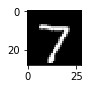

In [39]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(1,1))
plt.imshow(x_test[0].reshape((28, 28)), cmap=plt.get_cmap('gray'))

In [40]:
# print(type(x_test))
# print(type(x_test[0]))
# print(x_test.shape)
# print(x_test[0].shape)

from keras.utils import np_utils
import numpy as np
data = x_test[0].reshape((1, 1, 28, 28))

# print(type(data))
# print(data.shape)
# print(x_test[0])
# print(data)

# x = model.predict_classes(data)
# print(x)
# => [7]

x_proba = model.predict(data)
x_classes = x_proba.argmax(axis=-1)

print(x_proba)
print(x_classes)

[[3.8849925e-14 1.3465165e-09 1.4711565e-12 6.4943972e-10 2.5596985e-12
  1.3729044e-12 1.7727435e-16 1.0000000e+00 2.0736455e-13 1.5681237e-09]]
[7]


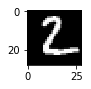

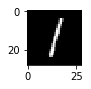

In [41]:
plt.figure(figsize=(1,1))
plt.imshow(x_test[1].reshape((28, 28)), cmap=plt.get_cmap('gray'))

plt.figure(figsize=(1,1))
plt.imshow(x_test[2].reshape((28, 28)), cmap=plt.get_cmap('gray'))

In [42]:
data = x_test[1].reshape((1, 1, 28, 28))
x_proba = model.predict(data)
x_classes = x_proba.argmax(axis=-1)

print(x_classes)

data = x_test[2].reshape((1, 1, 28, 28))
x_proba = model.predict(data)
x_classes = x_proba.argmax(axis=-1)

print(x_classes)

[2]
[1]
